In [2]:
from ROOT import *
import numpy as np
import matplotlib.pyplot as plt


Welcome to JupyROOT 6.24/02


In [3]:
t1=np.array([]);tc1=np.array([]);risc1=np.array([]);pt1=np.array([])
t2=np.array([]);tc2=np.array([]);risc2=np.array([]);pt2=np.array([])
t3=np.array([]);tc3=np.array([]);risc3=np.array([]);pt3=np.array([])
t4=np.array([]);tc4=np.array([]);risc4=np.array([]);pt4=np.array([])
t5=np.array([]);tc5=np.array([]);risc5=np.array([]);pt5=np.array([])

G=2000; thermal_conversion=41e-6

for line in open("file_1_1s.lvm"):
    d=line.split()
    if len(d)!=4:
        continue
    t1   = np.append(t1,  float(d[0])); tc1   = np.append(tc1,  -float(d[1])/(G*thermal_conversion))
    risc1  = np.append(risc1, float(d[2])); pt1  = np.append(pt1, float(d[3]))

for line in open("file_2_1s.txt"):
    d=line.split()
    if len(d)!=4:
        continue
    t2   = np.append(t2,  float(d[0])); tc2   = np.append(tc2,  -float(d[1])/(G*thermal_conversion))
    risc2  = np.append(risc2, float(d[2])); pt2  = np.append(pt2, float(d[3]))

for line in open("file_3_1s.txt"):
    d=line.split()
    if len(d)!=4:
        continue
    t3   = np.append(t3,  float(d[0])); tc3   = np.append(tc3,  -float(d[1])/(G*thermal_conversion))
    risc3  = np.append(risc3, float(d[2])); pt3  = np.append(pt3, float(d[3]))

for line in open("file_4_0.5s.txt"):
    d=line.split()
    if len(d)!=4:
        continue
    t4   = np.append(t4,  float(d[0])); tc4   = np.append(tc4,  -float(d[1])/(G*thermal_conversion))
    risc4  = np.append(risc4, float(d[2])); pt4  = np.append(pt4, float(d[3]))

for line in open("file_5_1.5s.txt"):
    d=line.split()
    if len(d)!=4:
        continue
    t5   = np.append(t5,  float(d[0])); tc5   = np.append(tc5,  -float(d[1])/(G*thermal_conversion))
    risc5  = np.append(risc5, float(d[2])); pt5  = np.append(pt5, float(d[3]))

In [4]:
offset=np.array([])
for i in range (0,30):
    offset=np.append(offset,tc1[i])

_offset=offset.mean()
e_tc=offset.std()

print(_offset, e_tc)

-4.637589430894309 0.011903856428554528


1.182424411136597e-05 +/- 2.2020698405721237e-08 p-value =  8.496178299035896e-55
1.1938901733159083e-05 +/- 2.2775964559174154e-08 p-value =  9.127424126204606e-60
1.192711121145535e-05 +/- 4.8699021175400196e-08 p-value =  2.4708401888683076e-17
1.2719196460501702e-05 +/- 2.7826788006553633e-08 p-value =  3.826618031527204e-96
1.093038892635146e-05 +/- 1.7620716520118138e-08 p-value =  2.4089010560449996e-16
 FCN=499.729 FROM MIGRAD    STATUS=CONVERGED     189 CALLS         190 TOTAL
                     EDM=2.26642e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.40968e-01   3.92426e-05   3.22502e-07  -1.03999e+00
   2  p1           1.18242e-05   2.20207e-08   1.80968e-10   1.49980e+03
   3  p2           1.10250e-04     fixed    
 FCN=527.907 FROM MIGRAD    STATUS=CONVERGED      48 CALLS          49 TOTAL
                 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


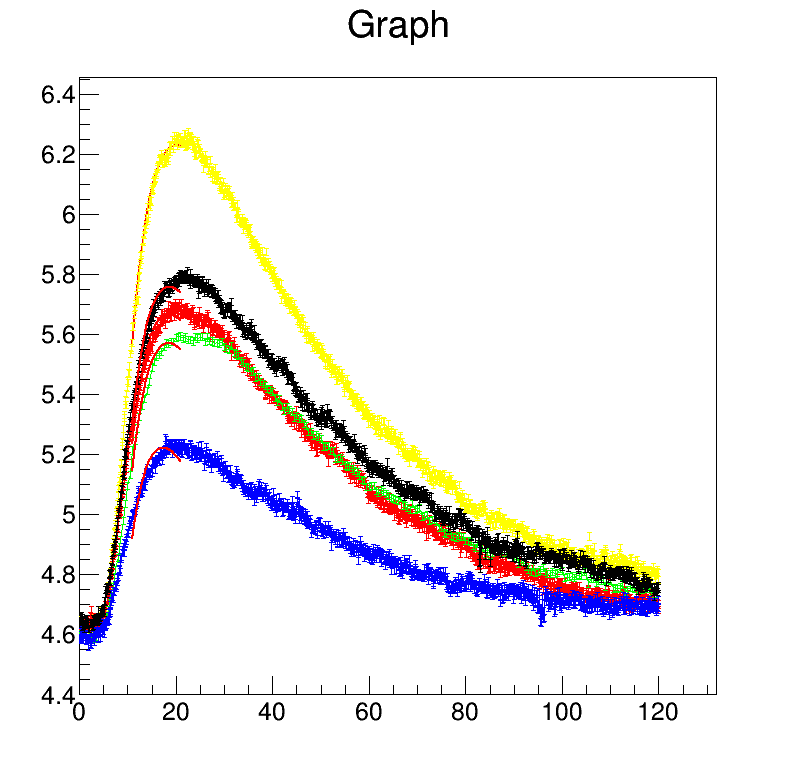

In [14]:
N1=t1.size; N2=t2.size; N3=t3.size; N4=t4.size; N5=t5.size

e_t1=np.zeros(N1); e_t2=np.zeros(N2); e_t3=np.zeros(N3); e_t4=np.zeros(N4); e_t5=np.zeros(N5);
e_tc1=np.ones(N1)*e_tc; e_tc2=np.ones(N2)*e_tc; e_tc3=np.ones(N3)*e_tc
e_tc4=np.ones(N4)*e_tc; e_tc5=np.ones(N5)*e_tc;

g1=TGraphErrors(N1,t1,tc1-_offset,e_t1,e_tc1)
g2=TGraphErrors(N2,t2,tc2-_offset,e_t2,e_tc2)
g3=TGraphErrors(N3,t3,tc3-_offset,e_t3,e_tc3)
g4=TGraphErrors(N4,t4,tc4-_offset,e_t4,e_tc4)
g5=TGraphErrors(N5,t5,tc5-_offset,e_t5,e_tc5)

g1.SetLineColor(1);g2.SetLineColor(2);g3.SetLineColor(3);g4.SetLineColor(4);g5.SetLineColor(5)

c1=TCanvas('c1','',800,800)
c1.Draw()

x=0.021
f=TF1('f','[0]/sqrt([1]*x)*exp(-[2]/(x*[1]))')
f.FixParameter(2,x**2/4)
f.SetParameter(1,1.1e-5)
f.SetParameter(0,1)
g1.Fit('f','','',11,21)
D1=f.GetParameter(1); eD1=f.GetParError(1); p1=f.GetProb()
g2.Fit('f','','',11,21)
D2=f.GetParameter(1); eD2=f.GetParError(1); p2=f.GetProb()
g3.Fit('f','','',11,21)
D3=f.GetParameter(1); eD3=f.GetParError(1); p3=f.GetProb()
g4.Fit('f','','',11,21)
D4=f.GetParameter(1); eD4=f.GetParError(1); p4=f.GetProb()
g5.Fit('f','','',11,21)
D5=f.GetParameter(1); eD5=f.GetParError(1); p5=f.GetProb()

g5.Draw('AP')
g2.Draw('SAME')
g3.Draw('SAME')
g4.Draw('SAME')
g1.Draw('SAME')

D=np.array([D1,D2,D3,D4,D5]); eD=np.array([eD1,eD2,eD3,eD4,eD5]); p=np.array([p1,p2,p3,p4,p5])
for i in range (0,D.size):
    print(D[i],'+/-',eD[i],'p-value = ',p[i])



1.3396965591450449e-05 +/- 6.086911075089073e-09
1.345217131914296e-05 +/- 6.158437106387578e-09
1.3377137251459983e-05 +/- 1.3990915055087905e-08
1.3674943865205491e-05 +/- 6.469539470422539e-09
1.3106263639499034e-05 +/- 5.738229342148166e-09
 FCN=28638.7 FROM MIGRAD    STATUS=CONVERGED      41 CALLS          42 TOTAL
                     EDM=4.02577e-15    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           5.09781e+00   2.36924e-04   3.85382e-06   9.54832e-04
   2  p1          -8.22948e+00   3.73906e-03   6.08198e-05   8.01530e-05
 FCN=27755 FROM MIGRAD    STATUS=CONVERGED      33 CALLS          34 TOTAL
                     EDM=2.30126e-15    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


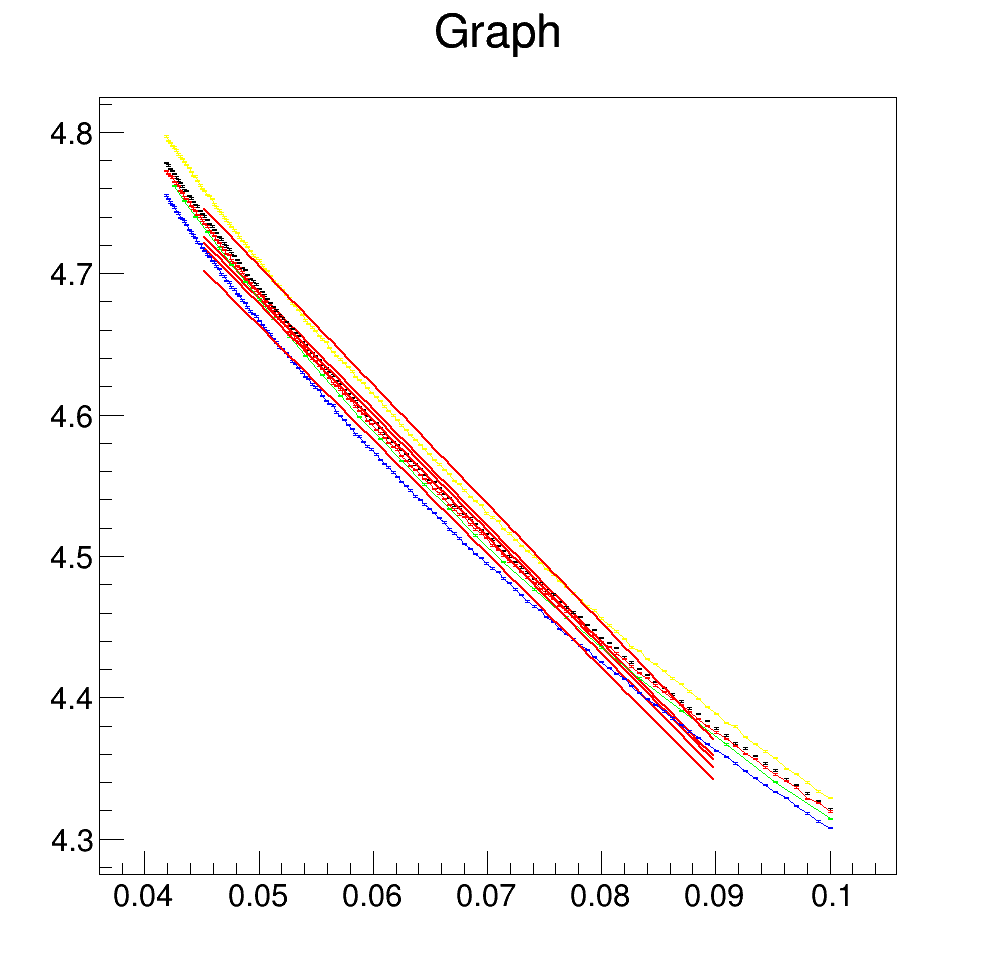

In [19]:
c2=TCanvas('c2','',1000,1000)
c2.Draw()

tc1=tc1-_offset; tc2=tc2-_offset; tc3=tc3-_offset; tc4=tc4-_offset; tc5=tc5-_offset; 

up=240; low=100; N=up-low
up3=48; low3=20; N3=up3-low3

T1=np.array([]);T2=np.array([]);T3=np.array([]);T4=np.array([]);T5=np.array([])
TC1=np.array([]);TC2=np.array([]);TC3=np.array([]);TC4=np.array([]);TC5=np.array([])
e_TC1=np.array([]); e_TC2=np.array([]); e_TC3=np.array([]); e_TC4=np.array([]); e_TC5=np.array([])

for i in range (low,up):
    T1=np.append(T1,t1[i]); TC1=np.append(TC1,tc1[i])
    T2=np.append(T2,t2[i]); TC2=np.append(TC2,tc2[i])
    T4=np.append(T4,t4[i]); TC4=np.append(TC4,tc4[i])
    T5=np.append(T5,t5[i]); TC5=np.append(TC5,tc5[i])
    e_TC1=np.append(e_TC1,e_tc/tc1[i])
    e_TC2=np.append(e_TC2,e_tc/tc2[i])
    e_TC4=np.append(e_TC4,e_tc/tc4[i])
    e_TC5=np.append(e_TC5,e_tc/tc5[i])
    
    
for i in range (low3,up3):
    T3=np.append(T3,t3[i]); TC3=np.append(TC3,tc3[i]); e_TC3=np.append(e_TC3,e_tc/tc3[i])


e_t=np.zeros(N); e_t3=np.zeros(N3)

g1=TGraphErrors(N,1/T1,np.log(np.sqrt(T1)*TC1),e_t,e_TC1)
g2=TGraphErrors(N,1/T2,np.log(np.sqrt(T2)*TC2),e_t,e_TC2)
g3=TGraphErrors(N3,1/T3,np.log(np.sqrt(T3)*TC3),e_t3,e_TC3)
g4=TGraphErrors(N,1/T4,np.log(np.sqrt(T4)*TC4),e_t,e_TC4)
g5=TGraphErrors(N,1/T5,np.log(np.sqrt(T5)*TC5),e_t,e_TC5)

g1.SetLineColor(1); g2.SetLineColor(2); g3.SetLineColor(3); g4.SetLineColor(4); g5.SetLineColor(5); 

f=TF1('f','[0]+x*[1]')

g1.Fit('f','','',0.045,0.09)
P1=f.GetParameter(1); eP1=f.GetParError(1)
g2.Fit('f','','',0.045,0.09)
P2=f.GetParameter(1);eP2=f.GetParError(1)
g3.Fit('f','','',0.045,0.09)
P3=f.GetParameter(1);eP3=f.GetParError(1)
g4.Fit('f','','',0.045,0.09)
P4=f.GetParameter(1);eP4=f.GetParError(1)
g5.Fit('f','','',0.045,0.09)
P5=f.GetParameter(1);eP5=f.GetParError(1)

g1.Draw('AP')
g2.Draw('SAME')
g3.Draw('SAME')
g4.Draw('SAME')
g5.Draw('SAME')

x=0.021
P=np.array([P1,P2,P3,P4,P5]); eP=np.array([eP1,eP2,eP3,eP4,eP5])
D=np.ones(P.size)*(-x**2)/(4*P)
eD=np.ones(P.size)*x**2/(4*P**2)*eP

for i in range (0,D.size):
    print(D[i],'+/-',eD[i])